<a href="https://colab.research.google.com/github/NihalPuram/Stock_Price_Model/blob/master/Stock_Project_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gathering Data

In [47]:
import pandas_datareader as pdr

In [48]:
df = pdr.get_data_tiingo('AAPL',api_key='01242f1841e2df26cc68cb4785d24b58cc1e60c8')

In [49]:
df.to_csv('DATA.csv')

In [50]:
import pandas as pd

df = pd.read_csv("DATA.csv")

In [51]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-09-11 00:00:00+00:00,114.21,114.21,111.760,111.79,49915473,26.381964,26.381964,25.816025,25.822955,199661892,0.0,1.0
1,AAPL,2015-09-14 00:00:00+00:00,115.31,116.89,114.860,116.58,58363431,26.636058,27.001031,26.532110,26.929422,233453724,0.0,1.0
2,AAPL,2015-09-15 00:00:00+00:00,116.28,116.53,114.420,115.93,43341155,26.860124,26.917872,26.430473,26.779275,173364620,0.0,1.0
3,AAPL,2015-09-16 00:00:00+00:00,116.41,116.54,115.440,116.25,37173489,26.890153,26.920182,26.666088,26.853194,148693956,0.0,1.0
4,AAPL,2015-09-17 00:00:00+00:00,113.92,116.49,113.715,115.66,64112641,26.314975,26.908633,26.267621,26.716907,256450564,0.0,1.0


In [52]:
df1=df.reset_index()['close']

In [53]:
df1.head()

0    114.21
1    115.31
2    116.28
3    116.41
4    113.92
Name: close, dtype: float64

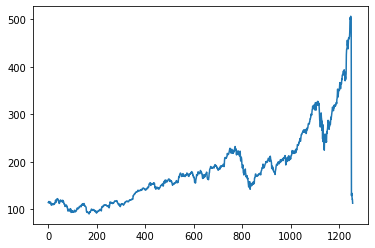

In [54]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [55]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [56]:
df1.shape

(1257, 1)

In [57]:
df1

array([[0.05741431],
       [0.06006013],
       [0.06239327],
       ...,
       [0.07345761],
       [0.07365003],
       [0.05407096]])

# Train-Test split

In [58]:
split_size = 0.80
train_size = int(len(df1)*split_size)
train_data,test_data = df1[0:train_size,:],df1[train_size:,:1]

In [59]:
len(test_data)

252

In [60]:
len(train_data)

1005

In [61]:
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [62]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [63]:
X_train

array([[0.05741431, 0.06006013, 0.06239327, ..., 0.01464823, 0.00995791,
        0.0144558 ],
       [0.06006013, 0.06239327, 0.06270595, ..., 0.00995791, 0.0144558 ,
        0.01505713],
       [0.06239327, 0.06270595, 0.05671678, ..., 0.0144558 , 0.01505713,
        0.00885147],
       ...,
       [0.26123873, 0.2610463 , 0.26191221, ..., 0.28543596, 0.28478653,
        0.27747444],
       [0.2610463 , 0.26191221, 0.26196031, ..., 0.28478653, 0.27747444,
        0.28586891],
       [0.26191221, 0.26196031, 0.27129284, ..., 0.27747444, 0.28586891,
        0.29570655]])

In [64]:
print(y_train.shape)
print(X_train.shape)

(904,)
(904, 100)


In [65]:
#reshape data to be [sample,time_ steps,features] ie 3 dimensions
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# Create LSTM Model

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Dropout
model = Sequential()
model.add(Bidirectional(LSTM(50,return_sequences = True), input_shape = (time_step,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',optimizer='adam')

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 100, 100)          20800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           30200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               26112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [68]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=2)

Epoch 1/100
15/15 - 3s - loss: 0.0634 - val_loss: 0.3540
Epoch 2/100
15/15 - 1s - loss: 0.0199 - val_loss: 0.2198
Epoch 3/100
15/15 - 1s - loss: 0.0098 - val_loss: 0.1637
Epoch 4/100
15/15 - 1s - loss: 0.0082 - val_loss: 0.1355
Epoch 5/100
15/15 - 1s - loss: 0.0029 - val_loss: 0.0978
Epoch 6/100
15/15 - 1s - loss: 0.0016 - val_loss: 0.1113
Epoch 7/100
15/15 - 1s - loss: 0.0014 - val_loss: 0.0775
Epoch 8/100
15/15 - 1s - loss: 0.0014 - val_loss: 0.0832
Epoch 9/100
15/15 - 1s - loss: 0.0011 - val_loss: 0.0830
Epoch 10/100
15/15 - 1s - loss: 0.0010 - val_loss: 0.0796
Epoch 11/100
15/15 - 1s - loss: 9.8739e-04 - val_loss: 0.0790
Epoch 12/100
15/15 - 1s - loss: 0.0010 - val_loss: 0.0800
Epoch 13/100
15/15 - 1s - loss: 9.1953e-04 - val_loss: 0.0798
Epoch 14/100
15/15 - 1s - loss: 8.6191e-04 - val_loss: 0.0768
Epoch 15/100
15/15 - 1s - loss: 9.0460e-04 - val_loss: 0.0797
Epoch 16/100
15/15 - 1s - loss: 8.9930e-04 - val_loss: 0.0838
Epoch 17/100
15/15 - 1s - loss: 7.8549e-04 - val_loss: 0.0826

In [69]:
final_train,final_test = create_dataset(df1,100)

In [70]:
#reshape
final_train = final_train.reshape(final_train.shape[0],final_train.shape[1],1)

In [71]:
model.fit(final_train,final_test,epochs=100,batch_size=64,verbose=2)

Epoch 1/100
19/19 - 2s - loss: 0.0050
Epoch 2/100
19/19 - 2s - loss: 0.0029
Epoch 3/100
19/19 - 2s - loss: 0.0025
Epoch 4/100
19/19 - 2s - loss: 0.0023
Epoch 5/100
19/19 - 2s - loss: 0.0028
Epoch 6/100
19/19 - 2s - loss: 0.0021
Epoch 7/100
19/19 - 2s - loss: 0.0019
Epoch 8/100
19/19 - 2s - loss: 0.0019
Epoch 9/100
19/19 - 2s - loss: 0.0020
Epoch 10/100
19/19 - 2s - loss: 0.0022
Epoch 11/100
19/19 - 2s - loss: 0.0021
Epoch 12/100
19/19 - 2s - loss: 0.0017
Epoch 13/100
19/19 - 2s - loss: 0.0016
Epoch 14/100
19/19 - 2s - loss: 0.0018
Epoch 15/100
19/19 - 2s - loss: 0.0016
Epoch 16/100
19/19 - 2s - loss: 0.0015
Epoch 17/100
19/19 - 2s - loss: 0.0018
Epoch 18/100
19/19 - 2s - loss: 0.0016
Epoch 19/100
19/19 - 2s - loss: 0.0015
Epoch 20/100
19/19 - 2s - loss: 0.0016
Epoch 21/100
19/19 - 2s - loss: 0.0014
Epoch 22/100
19/19 - 2s - loss: 0.0015
Epoch 23/100
19/19 - 2s - loss: 0.0018
Epoch 24/100
19/19 - 2s - loss: 0.0013
Epoch 25/100
19/19 - 2s - loss: 0.0013
Epoch 26/100
19/19 - 2s - loss: 0.

# Predict the plot outcome

In [72]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,train_predict))

0.01305516949678191

In [74]:
np.sqrt(mean_squared_error(y_test,test_predict))

0.07259471452885786

In [75]:
len(test_data)

252

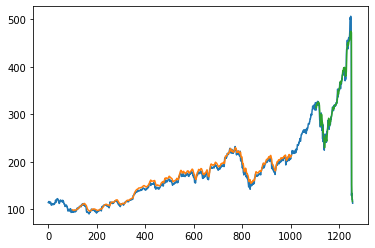

In [76]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(scaler.inverse_transform(trainPredictPlot))
plt.plot(scaler.inverse_transform(testPredictPlot))
plt.show()

# Predict the next 30 days

In [77]:
len(test_data)

252

In [78]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [79]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [80]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
days = 30
while(i<days):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

In [81]:
day_new=np.arange(1,101)
day_pred=np.arange(101,101+days)

In [82]:
len(df1)

1257

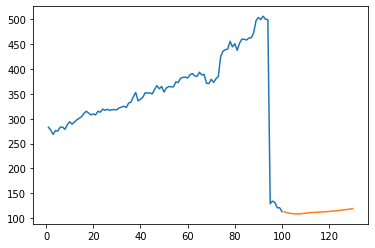

In [83]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

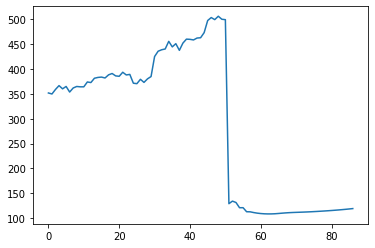

In [84]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(scaler.inverse_transform(df3[1200:]))

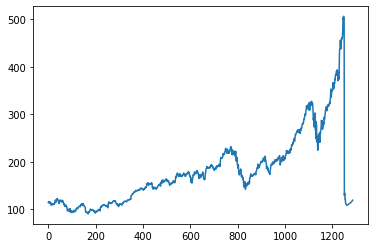

In [85]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [86]:
temp_input

[0.5474443776307878,
 0.5568490679494889,
 0.5604329524954901,
 0.5647143716175587,
 0.5579795550210462,
 0.5800601322910404,
 0.584774503908599,
 0.6101022248947685,
 0.6313890559230306,
 0.5906434155141311,
 0.5976187612748045,
 0.607696933253157,
 0.6295610342754059,
 0.6283824413710162,
 0.628719182200842,
 0.6238845460012028,
 0.6458929645219482,
 0.6643174984966926,
 0.6487552615754661,
 0.6602525556223691,
 0.6332892363199039,
 0.6528923631990378,
 0.6601563439567049,
 0.6584966927239928,
 0.6584966927239928,
 0.6819242333132893,
 0.6791340950090199,
 0.7000120264582081,
 0.7039567047504509,
 0.7055682501503309,
 0.7013108839446784,
 0.7165123271196634,
 0.7229344558027659,
 0.7113650030066145,
 0.7094888755261575,
 0.7290198436560433,
 0.7159591100420926,
 0.7185808779314491,
 0.6759831629585087,
 0.673770294648226,
 0.6948887552615755,
 0.6799037883343355,
 0.6971016235718581,
 0.7081659651232712,
 0.8050511124473845,
 0.830811785929044,
 0.8378111846061336,
 0.841635598316296